In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pycircstat2 import Circular, load_data
from pycircstat2.clustering import MovM, CircHAC

# Clustering circular data

Here, we use dataset B3 from Fisher (1993) to demonstrate the usage of MovM (Mixture of von Mises), as it is also the example shown in Jammalamadaka & Vaidyanathan (2024). We compare the result of MovM with CircHAC (Circular Hierarchical Agglomerative Clustering).

In [2]:
d = load_data("B3", source="fisher")["θ"].values
movm = MovM(n_clusters=2, unit="degree", random_seed=42)
movm.fit(d)

In [3]:
μ2, μ1 = np.rad2deg(movm.m_).round(4)
κ2, κ1 = movm.kappa_.round(4)
p2, p1 = movm.p_.round(4)

print(f"μ1 = {μ1:.4f}, μ2 = {μ2:.4f}")
print(f"κ1 = {κ1:.4f}, κ2 = {κ2:.4f}")
print(f"p1 = {p1:.2f}, p2 = {p2:.2f}")

# from Jammalamadaka & Vaidyanathan (2024)
# μ1​=241.2036∘; μ2​=63.4716∘;  
# κ1=8.4465; κ2=2.6187;  
# p1=0.16; p2​=0.84.  


μ1 = 63.4706, μ2 = 241.1973
κ1 = 2.6090, κ2 = 8.4559
p1 = 0.84, p2 = 0.16


In [4]:
hac = CircHAC(n_clusters=2, unit="degree", random_seed=42)
hac.fit(d)

Text(0.5, 1.0, 'CircHAC cluster 2')

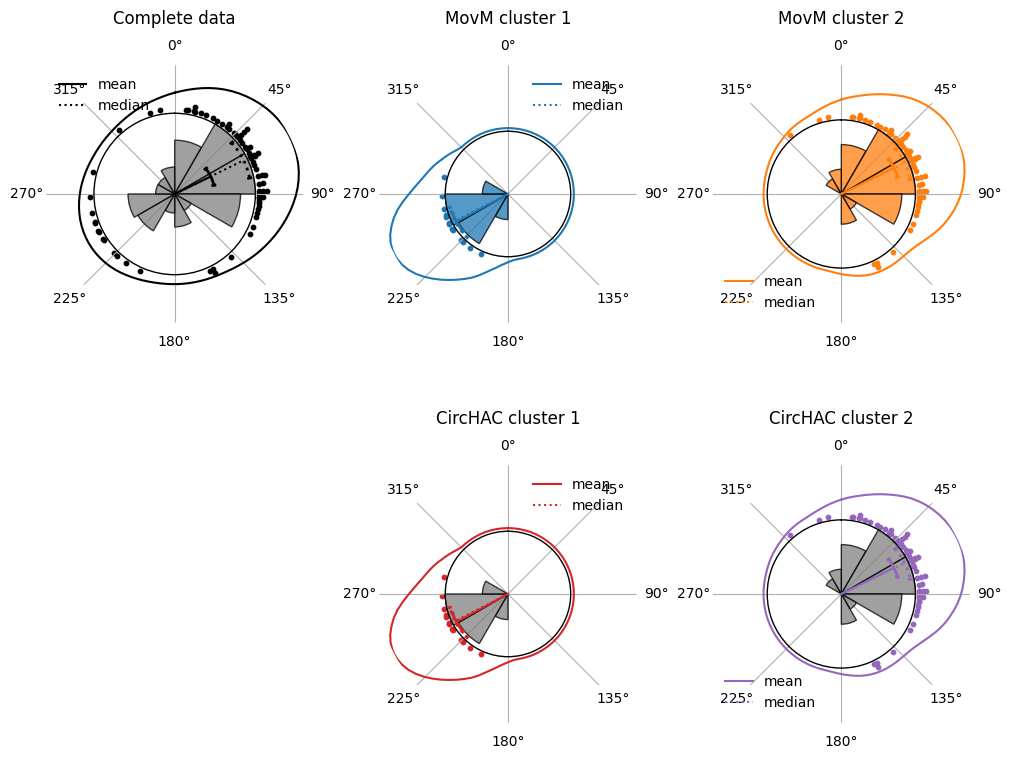

In [ ]:
ax_labels = ["A", "B", "C", "D", "E"]
fig, ax = plt.subplot_mosaic(
    mosaic="""
    ABC
    .DE
    """, figsize=(10, 8), 
    subplot_kw={"projection": "polar"},
    layout="constrained",
)

# complete data
c = Circular(d)
c.plot(ax=ax["A"])

for i, k in enumerate(range(2)):

    # clustered data    
    x_k = movm.x[movm.labels_ == k]
    c_k = Circular(data=x_k, unit=movm.unit)

    c_k.plot(
        ax=ax[ax_labels[i+1]], 
        config={
            "density": {"color": f"C{i}"},
            "scatter": {"color": f"C{i}"},
            "mean": {"color": f"C{i}"},
            "median": {"color": f"C{i}"},
            "rose": {"color": f"C{i}"},
        }
    )

for i, k in enumerate(range(2)):
    
    # clustered data    
    x_k = hac.alpha[hac.labels_ == k]
    c_k = Circular(data=x_k, unit=hac.unit)

    j = i + 3
    c_k.plot(
        ax=ax[ax_labels[j]], 
        config={
            "density": {"color": f"C{j}"},
            "scatter": {"color": f"C{j}"},
            "mean": {"color": f"C{j}"},
            "median": {"color": f"C{j}"},
            "rose": {"color": f"C{i}"},
        }
    )
    
ax["A"].set_title("Complete data", pad=30)
ax["B"].set_title("MovM cluster 1", pad=30)
ax["C"].set_title("MovM cluster 2", pad=30)
ax["D"].set_title("CircHAC cluster 1", pad=30)
ax["E"].set_title("CircHAC cluster 2", pad=30)

`MoVM` is actually already built into the `Circular` class as an exploratory tool. By setting `n_clusters_max` when initializing the `Circular` data object, `MoVM` will run `n_clusters_max` times, from 1 to `n_clusters_max`, and select the model with the lowest BIC as the optimal number of clusters.

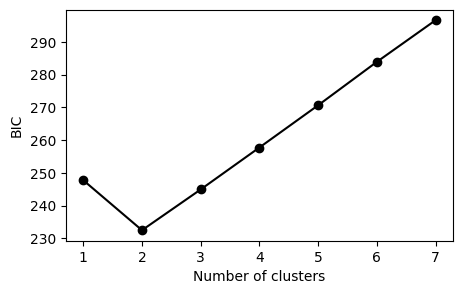

In [6]:
c = Circular(d, n_clusters_max=7)

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(range(1, 8), c.mixtures_BIC, marker="o", c="black")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("BIC")
plt.show()

In the dataset summary, the clustering result will be displayed on the second line (Unimodal?):

In [7]:
print(c.summary())

AttributeError: 'MovM' object has no attribute 'm'

In [ ]:
%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark

Last updated: 2025-02-18 18:17:24CET

Python implementation: CPython
Python version       : 3.12.9
IPython version      : 8.31.0

pycircstat2: 0.1.9
numpy      : 2.2.2
matplotlib : 3.10.0

Watermark: 2.5.0

